**Instalar e importar librerías**

In [ ]:
#!pip install pandas
#!pip install numpy
import pandas as pd
import numpy as np
import re
import matplotlib as plt

**Traer CSV de Github**

In [ ]:
!git clone https://github.com/FabrizioAlzamoraC/Metro-Systems-WorldWide.git

fatal: destination path 'Metro-Systems-WorldWide' already exists and is not an empty directory.


**Cargar CSV**

In [ ]:
data = pd.read_csv('/content/Metro-Systems-WorldWide/Proyecto/Metro-Systems-Worldwide.csv')
data

,City,Country\nregion,Name,Service\nopened,Last\nexpanded,Stations,System length,Annual ridership\n(millions)
0,Algiers,Algeria,Algiers Metro,2011,2018,19,18.5 km (11.5 mi),45.3 (2019)
1,Buenos Aires,Argentina,Buenos Aires Underground,1913,2019,78,56.7 km (35.2 mi),74.0 (2020)
2,Yerevan,Armenia,Yerevan Metro,1981,1996,10,12.1 km (7.5 mi),23.3 (2022)
3,Sydney,Australia,Sydney Metro,2019,–,13,36 km (22 mi),16.3 (2022)
4,Vienna,Austria,Vienna U-Bahn,1978,2017,98,83.3 km (51.8 mi),459.8 (2019)
...,...,...,...,...,...,...,...,...
200,San Juan,United States,Tren Urbano,2004,2005,16,17.2 km (10.7 mi),2.5 (2022)
201,"Washington, D.C.",United States,Washington Metro,1976,2023,98,206 km (128 mi),93.0 (2022)
202,Tashkent,Uzbekistan,Tashkent Metro,1977,2023,48,59.1 km (36.7 mi),136.7 (2022)
203,Caracas,Venezuela,Caracas Metro,1983,2015,49,67.2 km (41.8 mi),358 (2017)


**Cambiar nombre de columnas**

In [ ]:
data.rename(columns={'Country\nregion': 'Country or region', 'Service\nopened': 'Service opened',
                      'Last\nexpanded': 'Last expanded', 'Annual ridership\n(millions)': 'Annual ridership (millions)'
                     }, inplace=True)

**Identificar valores nulos por columnas**

In [ ]:
data.isnull().sum()

City                            0
Country or region               0
Name                            0
Service opened                  0
Last expanded                   0
Stations                        0
System length                   0
Annual ridership (millions)    16
dtype: int64

**Reemplazar datos nulos y -**

In [ ]:
data['Annual ridership (millions)'].fillna(0, inplace=True)
data = data.replace('–', '')

**Verificar si existen valores duplicados**

In [ ]:
data.duplicated().sum()

0

**Convertir tipo de datos**

In [ ]:
data[['City', 'Country or region','Name','Service opened','Last expanded','System length','Annual ridership (millions)']] = data[['City', 'Country or region','Name','Service opened','Last expanded','System length','Annual ridership (millions)']].astype(str)
data[['Stations']] = data[['Stations']].astype(int)
data.dtypes

City                           object
Country or region              object
Name                           object
Service opened                 object
Last expanded                  object
Stations                        int64
System length                  object
Annual ridership (millions)    object
dtype: object

**Separar columnas**

In [ ]:
data[['KM', 'Mi']] = data['System length'].str.extract(r'([\d.]+)\s+km\s+\(([\d.]+)')
data['Annual ridership'] = data['Annual ridership (millions)'].apply(lambda x: re.sub(r'\s*\(.*\)', '', x))

data['Annual ridership'] = data['Annual ridership'].str.replace(',', '')

data[['KM', 'Mi']] = data[['KM', 'Mi']].astype(float)
data[['Annual ridership']] = data[['Annual ridership']].astype(float)

**Eliminar columna System length**

In [ ]:
data.drop(columns=['System length', 'Annual ridership (millions)'])


,City,Country or region,Name,Service opened,Last expanded,Stations,KM,Mi,Annual ridership
0,Algiers,Algeria,Algiers Metro,2011,2018,19,18.5,11.5,45.3
1,Buenos Aires,Argentina,Buenos Aires Underground,1913,2019,78,56.7,35.2,74.0
2,Yerevan,Armenia,Yerevan Metro,1981,1996,10,12.1,7.5,23.3
3,Sydney,Australia,Sydney Metro,2019,,13,36.0,22.0,16.3
4,Vienna,Austria,Vienna U-Bahn,1978,2017,98,83.3,51.8,459.8
...,...,...,...,...,...,...,...,...,...
200,San Juan,United States,Tren Urbano,2004,2005,16,17.2,10.7,2.5
201,"Washington, D.C.",United States,Washington Metro,1976,2023,98,206.0,128.0,93.0
202,Tashkent,Uzbekistan,Tashkent Metro,1977,2023,48,59.1,36.7,136.7
203,Caracas,Venezuela,Caracas Metro,1983,2015,49,67.2,41.8,358.0


**Traer Continentes de página web**

In [ ]:
# URL de la página web
url = 'https://www.geonames.org/countries/'

# Leer las tablas de la página web
data_pais_continente = pd.read_html(url)

# Seleccionar la tabla que deseas almacenar en un DataFrame
data_pais_continente = data_pais_continente[1]  # Puedes modificar el índice según la tabla que necesites

# Renombrar columnas
data_pais_continente.rename(columns={'Country	': 'Country or region'}, inplace=True)

# Reemplazar NaN por "NA"
data_pais_continente['Continent'] = data_pais_continente['Continent'].fillna("Norte America")
data_pais_continente['Population'].fillna(0, inplace=True)

data_pais_continente

,ISO-3166 alpha2,ISO-3166 alpha3,ISO-3166 numeric,fips,Country,Capital,Area in km²,Population,Continent
0,AD,AND,20,AN,Andorra,Andorra la Vella,468.0,77006,EU
1,AE,ARE,784,AE,United Arab Emirates,Abu Dhabi,82880.0,9630959,AS
2,AF,AFG,4,AF,Afghanistan,Kabul,647500.0,37172386,AS
3,AG,ATG,28,AC,Antigua and Barbuda,St. John's,443.0,96286,Norte America
4,AI,AIA,660,AV,Anguilla,The Valley,102.0,13254,Norte America
...,...,...,...,...,...,...,...,...,...
245,YE,YEM,887,YM,Yemen,Sanaa,527970.0,28498687,AS
246,YT,MYT,175,MF,Mayotte,Mamoudzou,374.0,279471,AF
247,ZA,ZAF,710,SF,South Africa,Pretoria,1219912.0,57779622,AF
248,ZM,ZMB,894,ZA,Zambia,Lusaka,752614.0,17351822,AF


**Unificar los df para añadir columna Continente**

In [ ]:
data_metro = pd.merge(data, data_pais_continente, left_on='Country or region', right_on = 'Country', how='left')

# Eliminar columnas
data_metro = data_metro.drop(['ISO-3166 alpha2','ISO-3166 numeric','Country','fips'], axis=1)

# Convertir a entero
#data_metro['Population'] = data_metro['Population'].astype(int)

data_metro

,City,Country or region,Name,Service opened,Last expanded,Stations,System length,Annual ridership (millions),KM,Mi,Annual ridership,ISO-3166 alpha3,Capital,Area in km²,Population,Continent
0,Algiers,Algeria,Algiers Metro,2011,2018,19,18.5 km (11.5 mi),45.3 (2019),18.5,11.5,45.3,DZA,Algiers,2381740.0,42228429.0,AF
1,Buenos Aires,Argentina,Buenos Aires Underground,1913,2019,78,56.7 km (35.2 mi),74.0 (2020),56.7,35.2,74.0,ARG,Buenos Aires,2766890.0,44494502.0,SA
2,Yerevan,Armenia,Yerevan Metro,1981,1996,10,12.1 km (7.5 mi),23.3 (2022),12.1,7.5,23.3,ARM,Yerevan,29800.0,2951776.0,AS
3,Sydney,Australia,Sydney Metro,2019,,13,36 km (22 mi),16.3 (2022),36.0,22.0,16.3,AUS,Canberra,7686850.0,24992369.0,OC
4,Vienna,Austria,Vienna U-Bahn,1978,2017,98,83.3 km (51.8 mi),459.8 (2019),83.3,51.8,459.8,AUT,Vienna,83858.0,8847037.0,EU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,San Juan,United States,Tren Urbano,2004,2005,16,17.2 km (10.7 mi),2.5 (2022),17.2,10.7,2.5,USA,Washington,9629091.0,327167434.0,Norte America
201,"Washington, D.C.",United States,Washington Metro,1976,2023,98,206 km (128 mi),93.0 (2022),206.0,128.0,93.0,USA,Washington,9629091.0,327167434.0,Norte America
202,Tashkent,Uzbekistan,Tashkent Metro,1977,2023,48,59.1 km (36.7 mi),136.7 (2022),59.1,36.7,136.7,UZB,Tashkent,447400.0,32955400.0,AS
203,Caracas,Venezuela,Caracas Metro,1983,2015,49,67.2 km (41.8 mi),358 (2017),67.2,41.8,358.0,VEN,Caracas,912050.0,28870195.0,SA


**Separar variables categóricas de numéricas**

In [ ]:
var_categoricas = list(data_metro.select_dtypes(include=['object']).columns)
var_categoricas

['City',
 'Country or region',
 'Name',
 'Service opened',
 'Last expanded',
 'System length',
 'Annual ridership (millions)',
 'ISO-3166 alpha3',
 'Capital',
 'Continent']

In [ ]:
var_numericas = list(data_metro.select_dtypes(exclude=['object']).columns)
var_numericas

['Stations', 'KM', 'Mi', 'Annual ridership', 'Area in km²', 'Population']

In [ ]:
data_metro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   City                         205 non-null    object 
 1   Country or region            205 non-null    object 
 2   Name                         205 non-null    object 
 3   Service opened               205 non-null    object 
 4   Last expanded                205 non-null    object 
 5   Stations                     205 non-null    int64  
 6   System length                205 non-null    object 
 7   Annual ridership (millions)  205 non-null    object 
 8   KM                           205 non-null    float64
 9   Mi                           205 non-null    float64
 10  Annual ridership             205 non-null    float64
 11  ISO-3166 alpha3              204 non-null    object 
 12  Capital                      204 non-null    object 
 13  Area in km²         

In [ ]:
#@title Visualización de los valores faltantes
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
def report_missings(data, opt = 0):
  """
  data = dataframe
  opt = opcion de graficar {0: todo, >0 solo faltantes}
        default= 0
  """
  data_rep = round(data.isna().sum().sort_values(ascending=False)/len(data)*100, 3)
  data_rep2 = data.isna().sum().sort_values(ascending=False)
  df = pd.concat([data_rep2, data_rep], axis=1).reset_index()
  df.columns = ["Variable", "Cant. Nulos", "% Nulos"]
  df["Cant. No Nulos"] = len(data) - df["Cant. Nulos"]
  df = df.reindex(columns=["Variable","Cant. No Nulos","Cant. Nulos","% Nulos"])

  print("*"*100)
  print("*"*20, "Reporte General", "*"*20)
  print("*"*100)
  print(df)

  if opt:
    data_rep = data_rep[data_rep > 0] # opcional
  miss = data_rep.to_frame()
  miss.columns = ['Cantidad (%)']
  miss.index.names = ['Variable']
  miss['Variable'] = miss.index

  fig = plt.figure(figsize=(15,15))
  #plot the missing value count
  #plt.figure(figsize=(10,6))
  ax1 = fig.add_subplot(3,2,1)
  print("*"*70, "Graficas de datos faltantes", "*"*70)
  print("*"*180)
  missingno.bar(data, figsize=(10,5), fontsize=12, ax=ax1, color="dodgerblue");
  plt.title("Conteo de muestras para cada variable (porcentaje y cantidad)")

  ax3 = fig.add_subplot(3,2,3)
  sns.heatmap(data.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Valores perdidos'})
  plt.title("Distribución de valores perdidos")
  plt.tight_layout()


  ax2 = fig.add_subplot(3,2,2)
  #sns.set(style="whitegrid", color_codes=True)
  sns.barplot(x = 'Variable', y = 'Cantidad (%)', data=miss, ax=ax2)
  plt.title("Porcentaje de datos faltantes por variable")
  plt.xticks(rotation = 90)
  #plt.savefig("missing1.png", dpi=100)



  ax4 = fig.add_subplot(3,2,4)
  missingno.heatmap(data, cmap="RdYlGn", figsize=(10,5), fontsize=12, ax=ax4)
  plt.title("Correlación de nulidad entre variables")
  ax5 = fig.add_subplot(3,2,5)
  missingno.dendrogram(data, figsize=(10,5), fontsize=12,ax=ax5)
  plt.title("Dendograma basado en la correlación de valores faltantes")
  plt.tight_layout()

****************************************************************************************************
******************** Reporte General ********************
****************************************************************************************************
                       Variable  Cant. No Nulos  Cant. Nulos  % Nulos
0               ISO-3166 alpha3             204            1    0.488
1                       Capital             204            1    0.488
2                   Area in km²             204            1    0.488
3                    Population             204            1    0.488
4                     Continent             204            1    0.488
5                          City             205            0    0.000
6             Country or region             205            0    0.000
7                          Name             205            0    0.000
8                Service opened             205            0    0.000
9                 Last expanded         

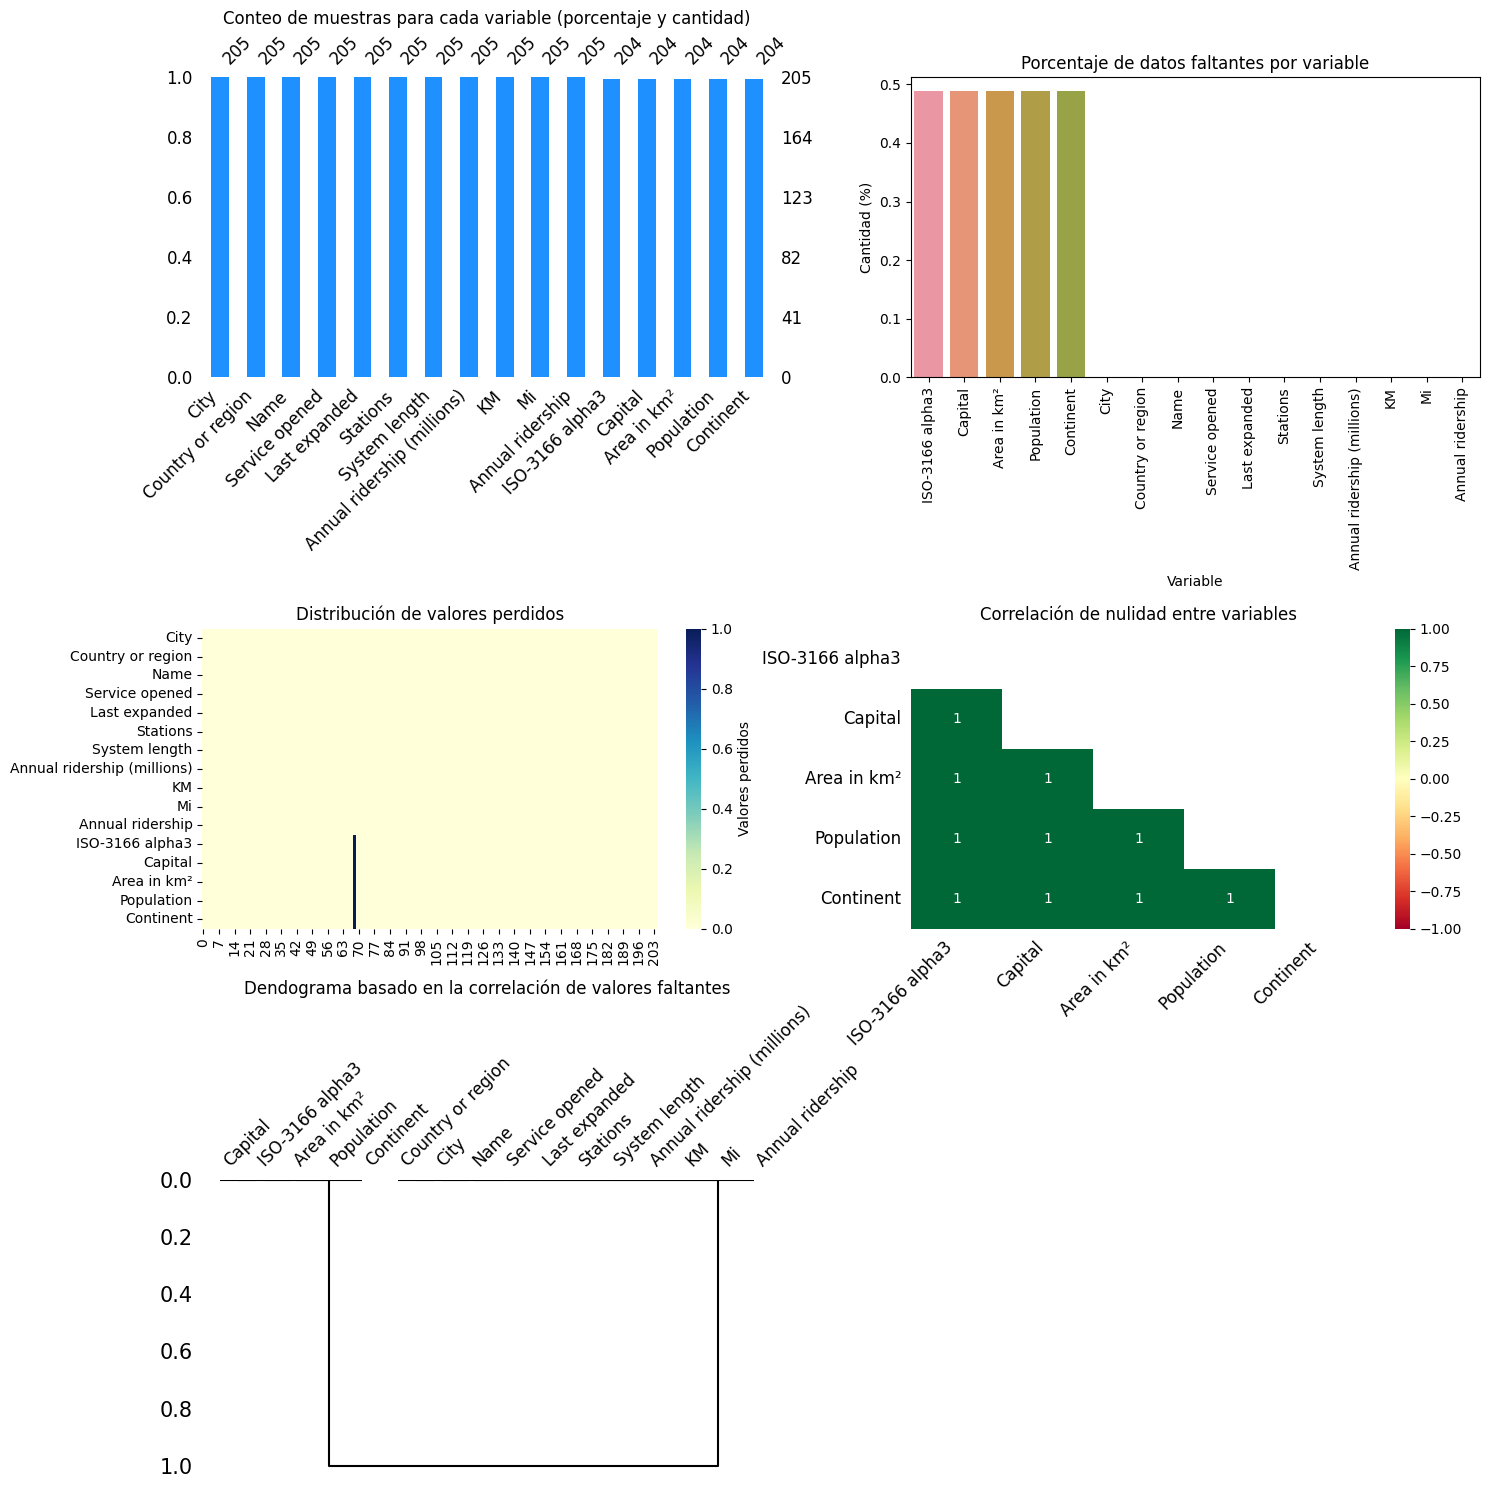

In [ ]:
report_missings(data_metro)

In [ ]:
fila_vacia = data_metro[data_metro.isnull().any(axis=1)]
fila_vacia

,City,Country or region,Name,Service opened,Last expanded,Stations,System length,Annual ridership (millions),KM,Mi,Annual ridership,ISO-3166 alpha3,Capital,Area in km²,Population,Continent
68,Prague,Czech Republic,Prague Metro,1974,2015,58,65.4 km (40.6 mi),251.4 (2020),65.4,40.6,251.4,NaN,NaN,NaN,NaN,NaN


Corrigiendo valores nulos por reales

In [ ]:
data_metro.at[68, 'ISO-3166 alpha3'] = 'CZE'
data_metro.at[68,'Capital'] = 'Prague'
data_metro.at[68, 'Area in km²'] = 78866.0
data_metro.at[68,'Population'] = 10625695
data_metro.at[68,'Continent'] = 'EU'

In [ ]:
fila_corregida = pd.DataFrame([data_metro.loc[68]])
fila_corregida

,City,Country or region,Name,Service opened,Last expanded,Stations,System length,Annual ridership (millions),KM,Mi,Annual ridership,ISO-3166 alpha3,Capital,Area in km²,Population,Continent
68,Prague,Czech Republic,Prague Metro,1974,2015,58,65.4 km (40.6 mi),251.4 (2020),65.4,40.6,251.4,CZE,Prague,78866.0,10625695.0,EU


****************************************************************************************************
******************** Reporte General ********************
****************************************************************************************************
                       Variable  Cant. No Nulos  Cant. Nulos  % Nulos
0                          City             205            0      0.0
1             Country or region             205            0      0.0
2                          Name             205            0      0.0
3                Service opened             205            0      0.0
4                 Last expanded             205            0      0.0
5                      Stations             205            0      0.0
6                 System length             205            0      0.0
7   Annual ridership (millions)             205            0      0.0
8                            KM             205            0      0.0
9                            Mi         

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.10/dist-packages/scipy/cluster/hierarchy.py:2848: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([dvw, 0])


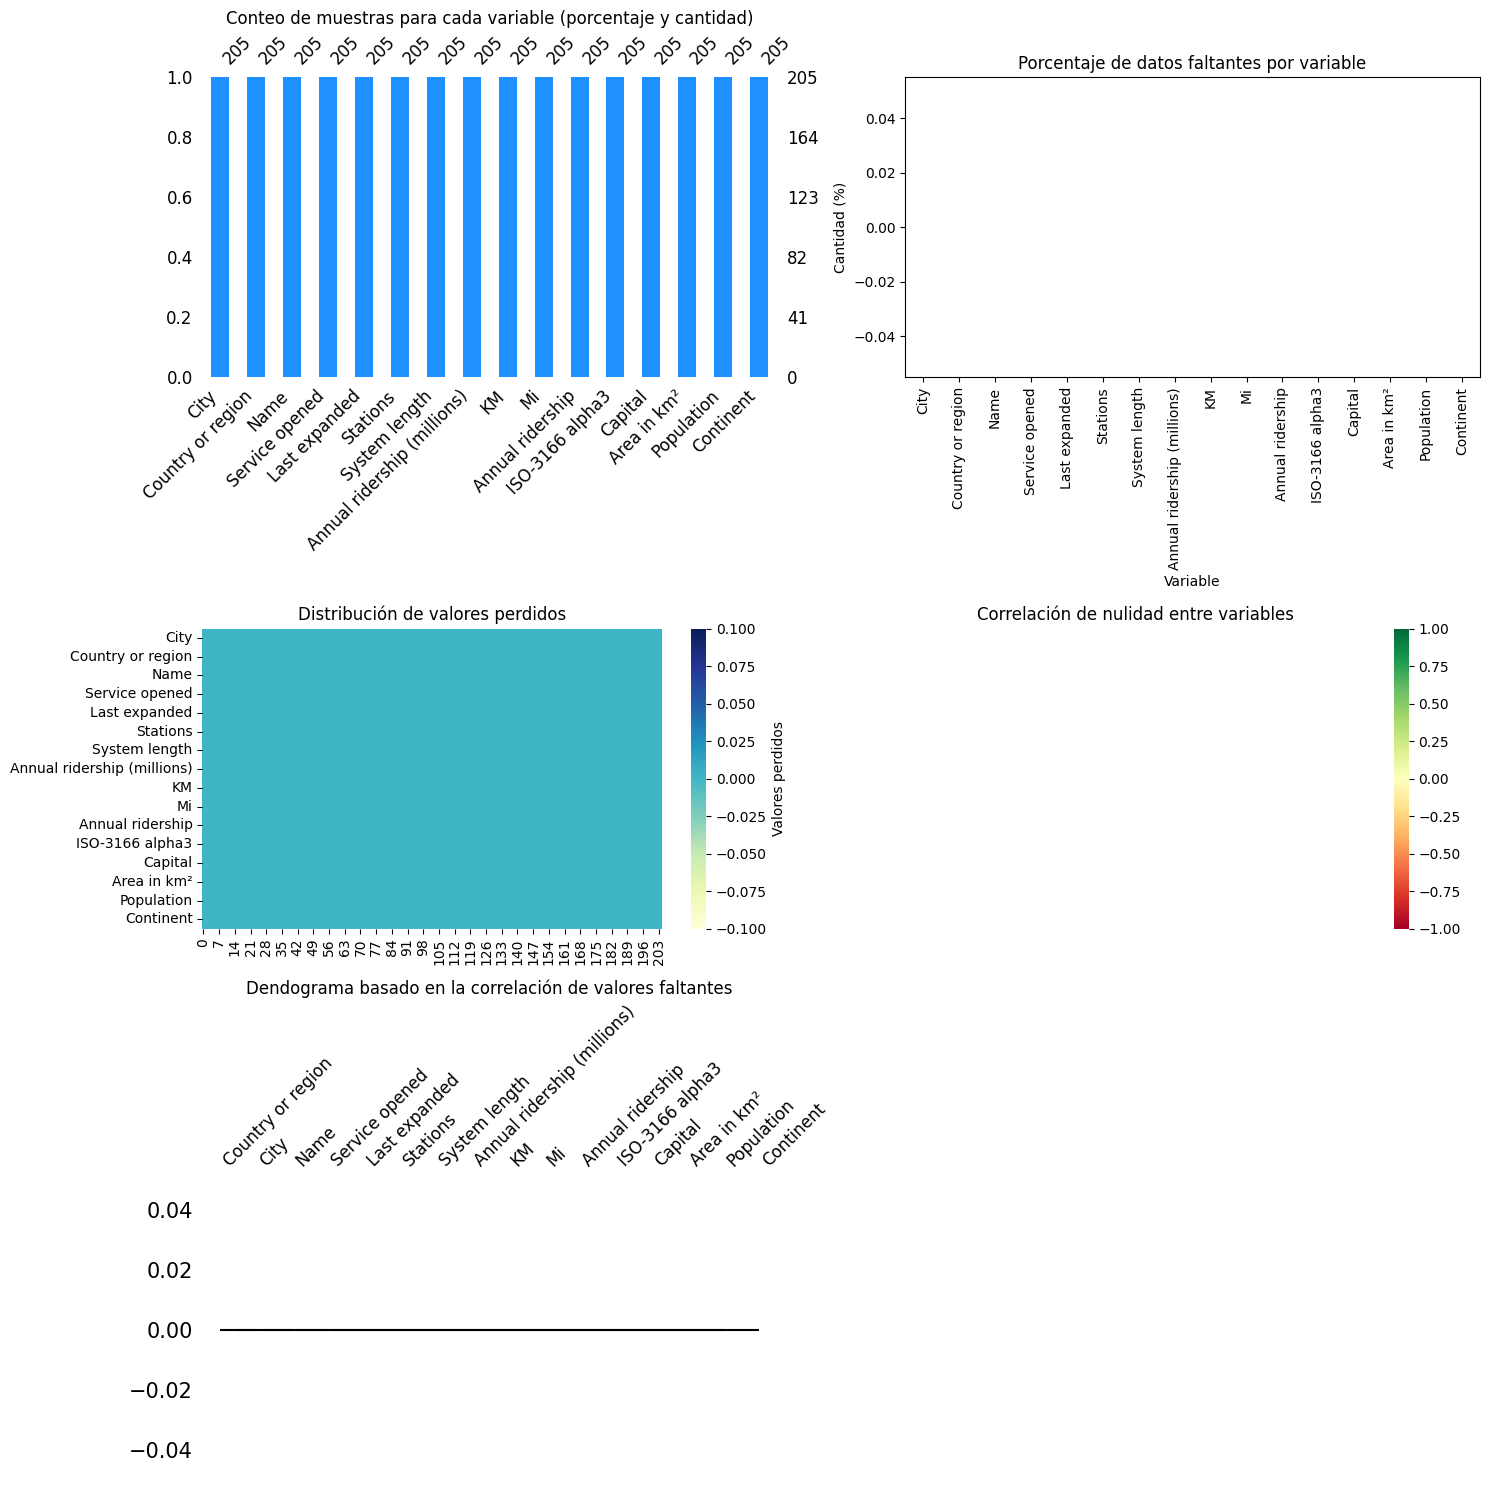

In [ ]:
report_missings(data_metro)

**Análisis numérico**

array([[<Axes: title={'center': 'Stations'}>,
        <Axes: title={'center': 'KM'}>],
       [<Axes: title={'center': 'Mi'}>,
        <Axes: title={'center': 'Annual ridership'}>],
       [<Axes: title={'center': 'Area in km²'}>,
        <Axes: title={'center': 'Population'}>]], dtype=object)

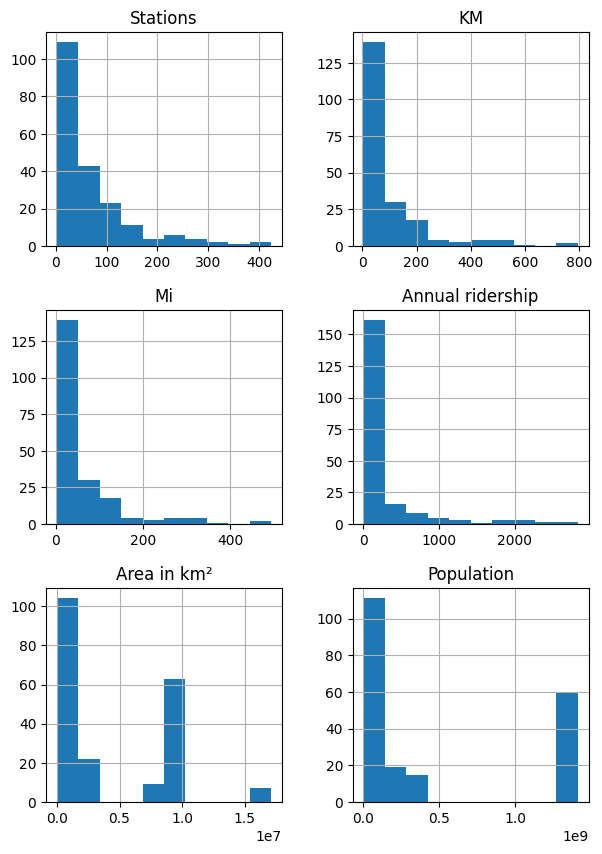

In [ ]:
data_metro.hist(figsize=(7,10))

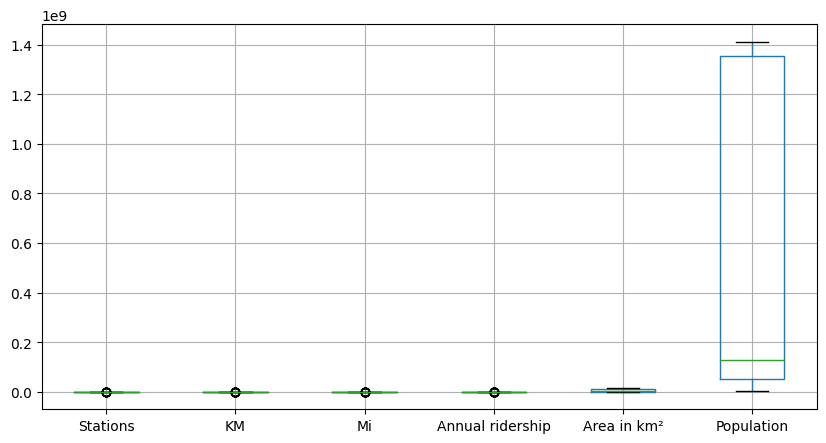

In [ ]:
boxplot = data_metro.boxplot(figsize=(10,5))

**Eliminación de valores atípicos**

In [ ]:
# Hallando el RIC para todo las variables
var_total = list(data_metro.select_dtypes(include=['object','float64','int64']).columns)

data_nueva = data_metro.copy()

for var in data_metro.drop(columns=var_total).columns.values:
  Q1 = np.percentile(data_metro[var],25,interpolation = "midpoint")
  Q3 = np.percentile(data_metro[var],75,interpolation = "midpoint")

  RIC = Q3-Q1

  superior = np.where(data_metro[var]>= (Q3+1.5*RIC))
  inferior = np.where(data_metro[var]<= (Q1-1.5*RIC))

  data_nueva = data_metro.drop(superior[0])
  data_nueva = data_nueva.drop(inferior[0])

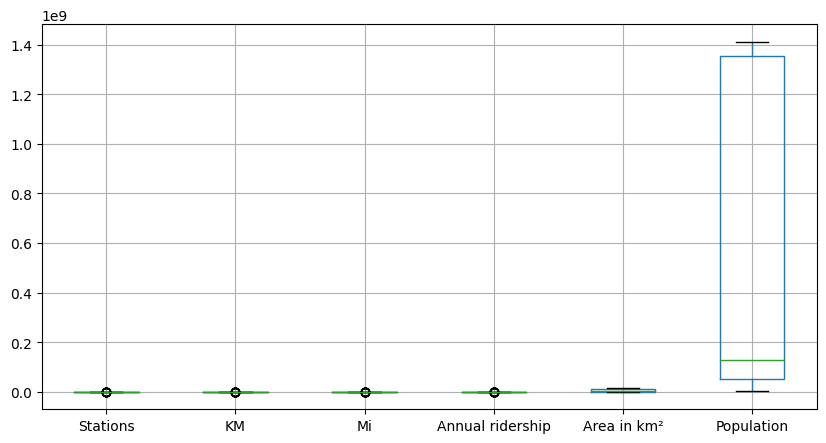

In [ ]:
boxplot = data_nueva.boxplot(figsize=(10,5))

**Matriz de correlación**

<ipython-input-104-0f71e0eafa55>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(data_nueva.corr(), dtype = np.bool))
<ipython-input-104-0f71e0eafa55>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(data_nueva.corr(), dtype = np.bool))
<ipython-input-104-0f71e0eafa55>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the va

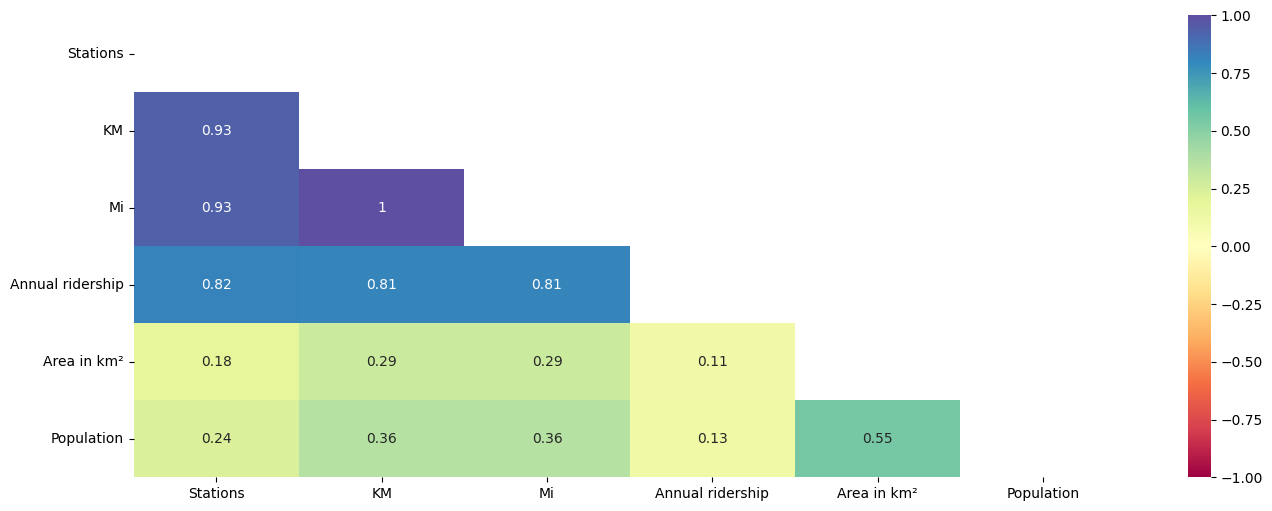

In [ ]:
plt.figure(figsize=(16,6))
mask = np.triu(np.ones_like(data_nueva.corr(), dtype = np.bool))
sns.heatmap(round(data_nueva.corr(), 2), mask = mask, cmap = "Spectral", annot = True, vmin = -1, vmax =1 )
plt.show()

<ipython-input-105-c3dbf183b145>:28: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(matr_corr, dtype = np.bool))


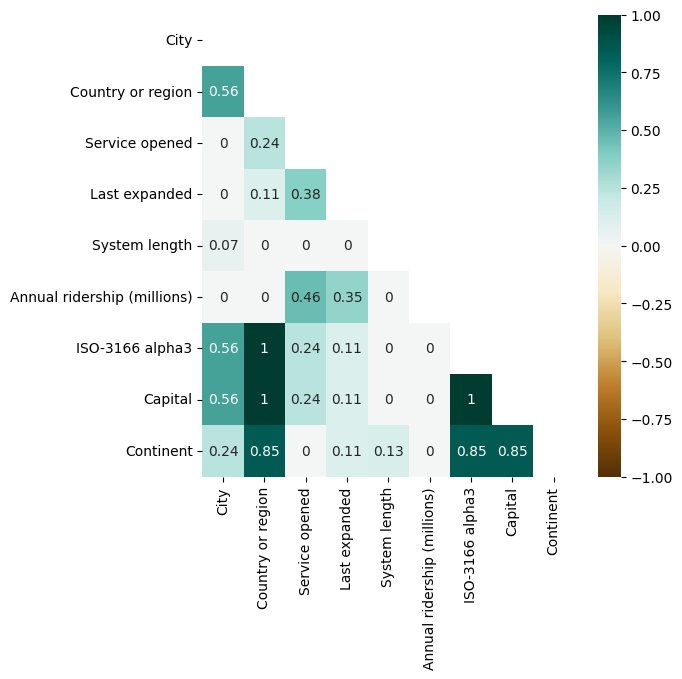

In [ ]:
#@title Funciones categoricas
var_categorias_1 = var_categoricas.pop(2)
matriz_cat = data_nueva[var_categoricas].copy()

from sklearn import preprocessing
from scipy.stats import chi2_contingency
def cramers_V(var1,var2):
  crosstab = np.array(pd.crosstab(var1,var2, rownames=None, colnames=None))
  chi2 = chi2_contingency(crosstab)[0]
  n = np.sum(crosstab)
  phi2 = chi2 / n
  r, k = crosstab.shape
  phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
  rcorr = r - ((r-1)**2)/(n-1)
  kcorr = k - ((k-1)**2)/(n-1)
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
rows = []
for var1 in matriz_cat.columns:
  col = []
  for var2 in matriz_cat.columns:
    cramer = cramers_V(matriz_cat[var1], matriz_cat[var2])
    col.append(round(cramer, 2))
  rows.append(col)

plt.figure(figsize=(6,6))
rows = np.array(rows)
matr_corr = pd.DataFrame(rows, columns = matriz_cat.columns, index = matriz_cat.columns)
mask = np.triu(np.ones_like(matr_corr, dtype = np.bool))
sns.heatmap(matr_corr, mask = mask, cmap = "BrBG", annot = True, vmin = -1, vmax = 1)
plt.show()

**Exportar a Excel**

In [ ]:
data_metro.to_excel('/content/sample_data/metro-system.xlsx', index=False)
#data.to_excel('/content/sample_data/metro-system-data.xlsx', index=False)

**Gráficos**

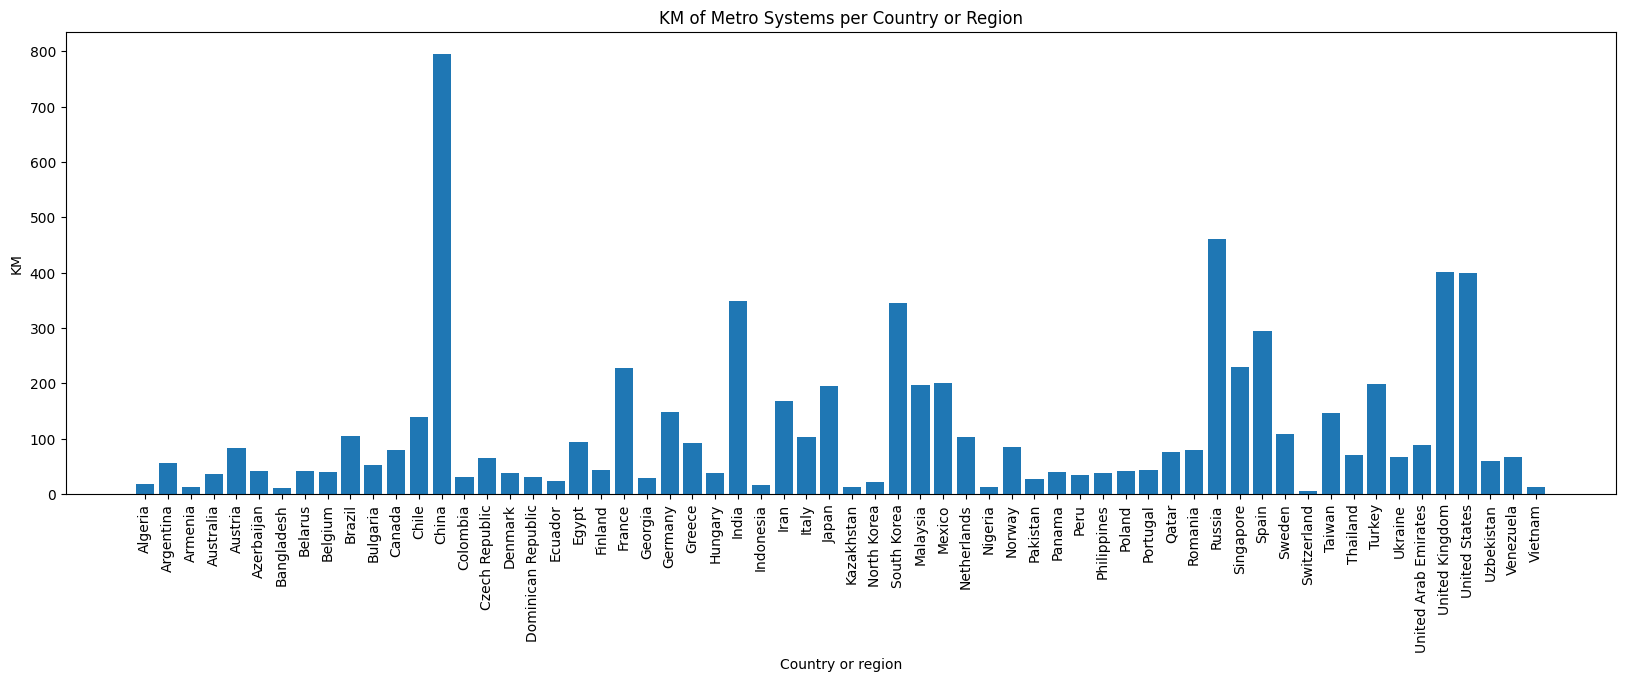

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(data_metro["Country or region"], data_metro["KM"])
ax.set_xlabel("Country or region")
ax.set_ylabel("KM")
ax.set_title("KM of Metro Systems per Country or Region")
ax.tick_params(axis='x', rotation=90)
plt.show()

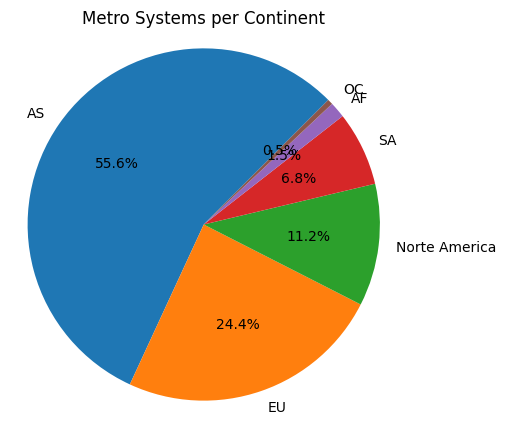

In [ ]:
# Contar la cantidad de sistemas de metros por país
systems_count = data_metro["Continent"].value_counts()

# Crear el gráfico de pastel
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_title("Metro Systems per Continent")
ax.pie(systems_count.values, labels=systems_count.index, autopct='%1.1f%%', startangle=45)

# Ajustar el aspecto del gráfico
ax.axis('equal')

# Mostrar el gráfico
plt.show()

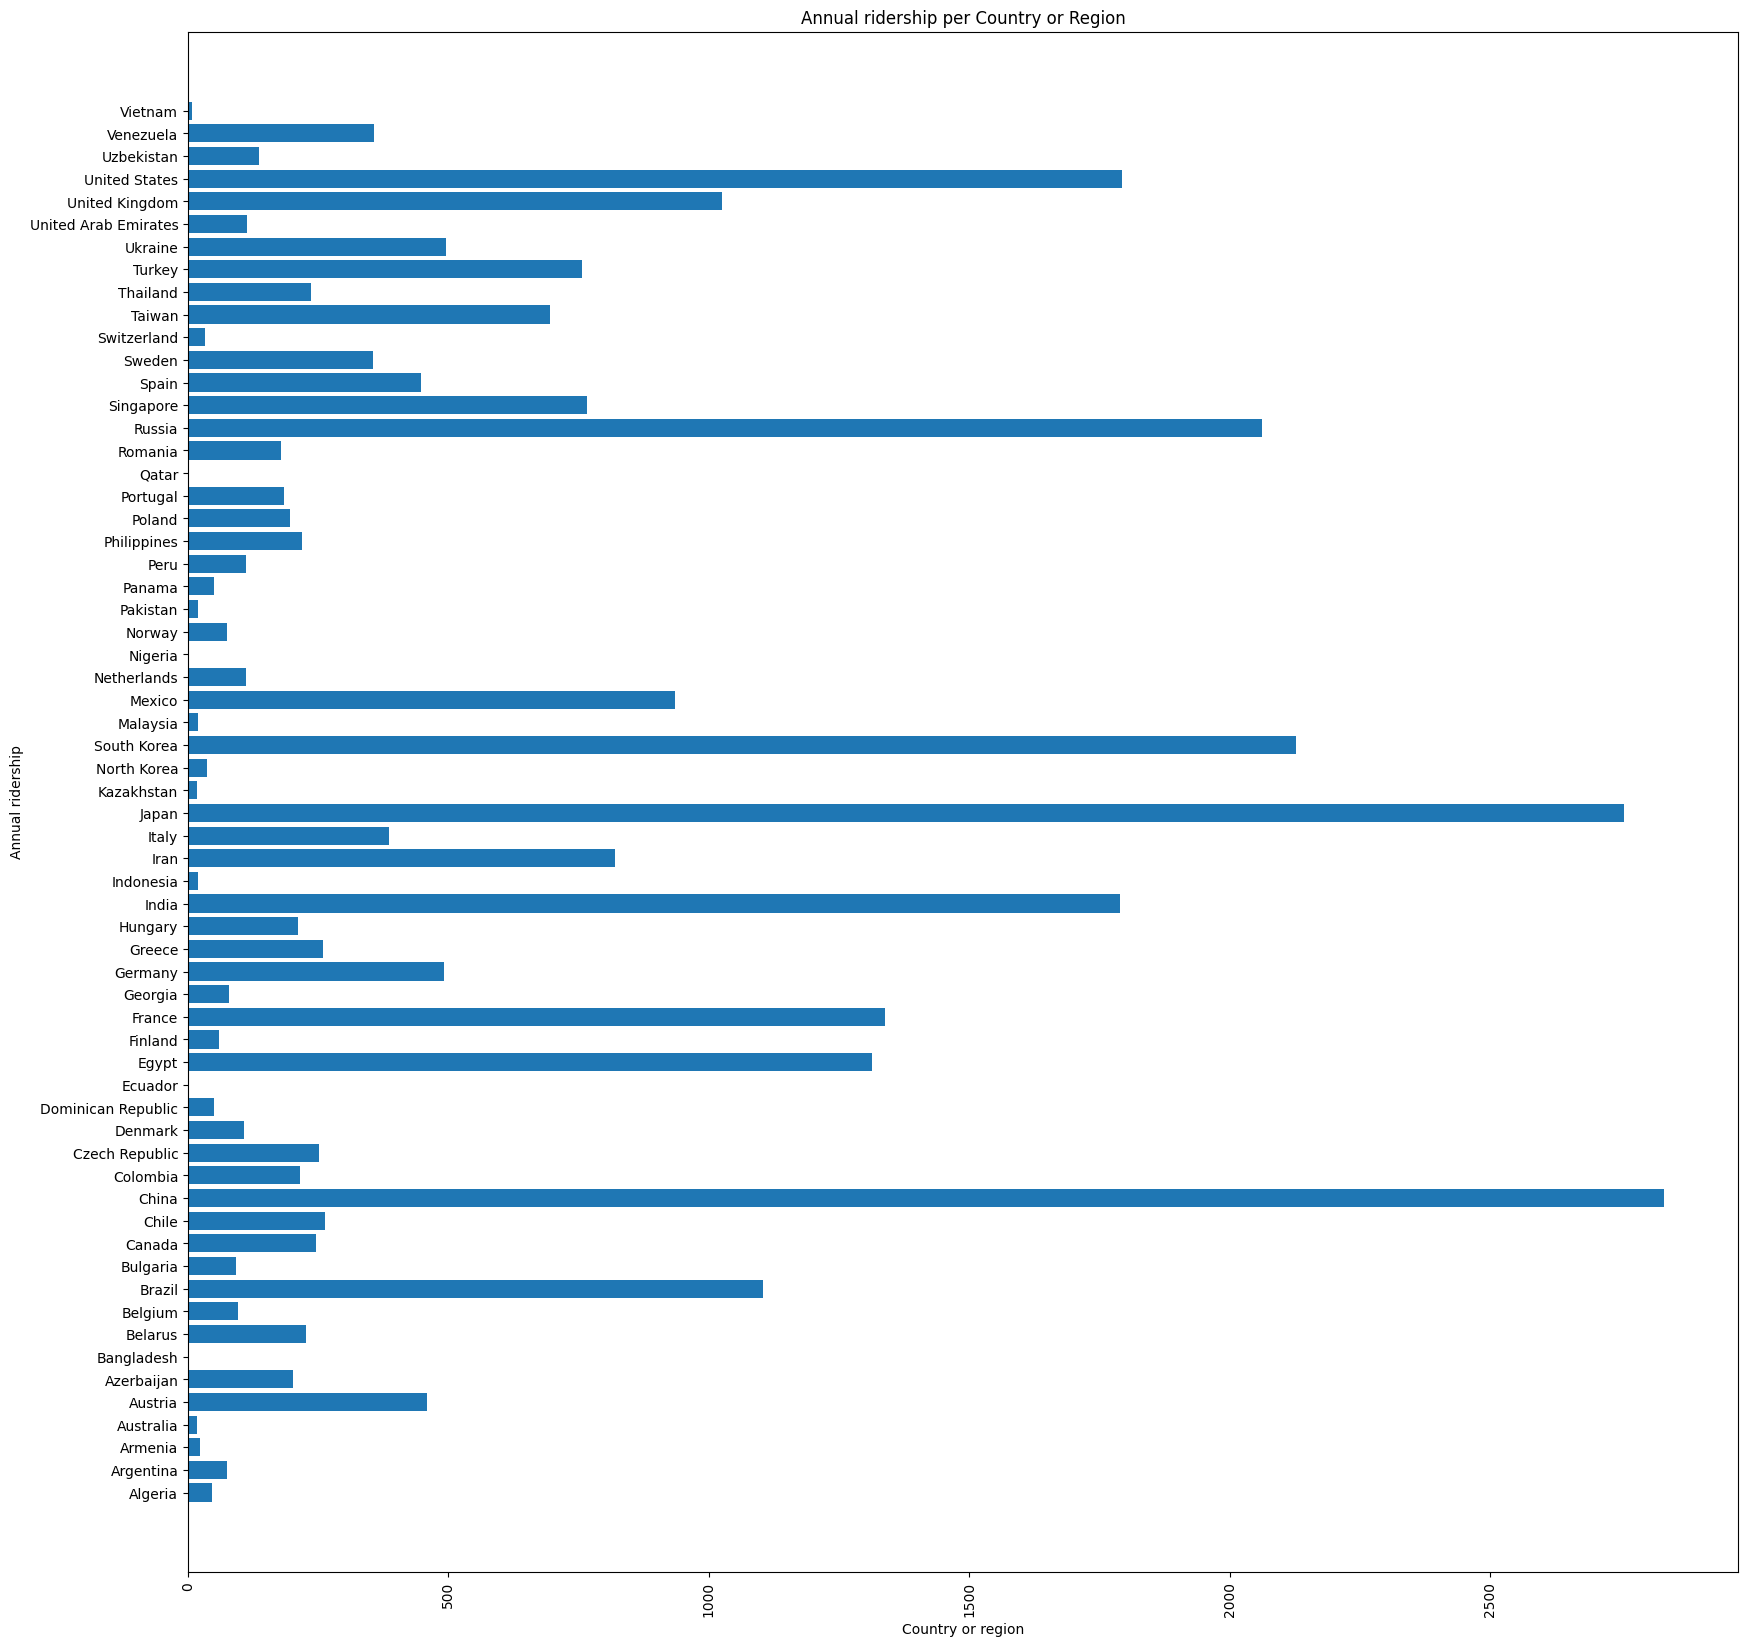

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.barh(data_metro["Country or region"], data_metro["Annual ridership"])
ax.set_xlabel("Country or region")
ax.set_ylabel("Annual ridership")
ax.set_title("Annual ridership per Country or Region")
ax.tick_params(axis='x', rotation=90)
plt.show()

Text(0.5, 1.0, 'Population vs Stations')

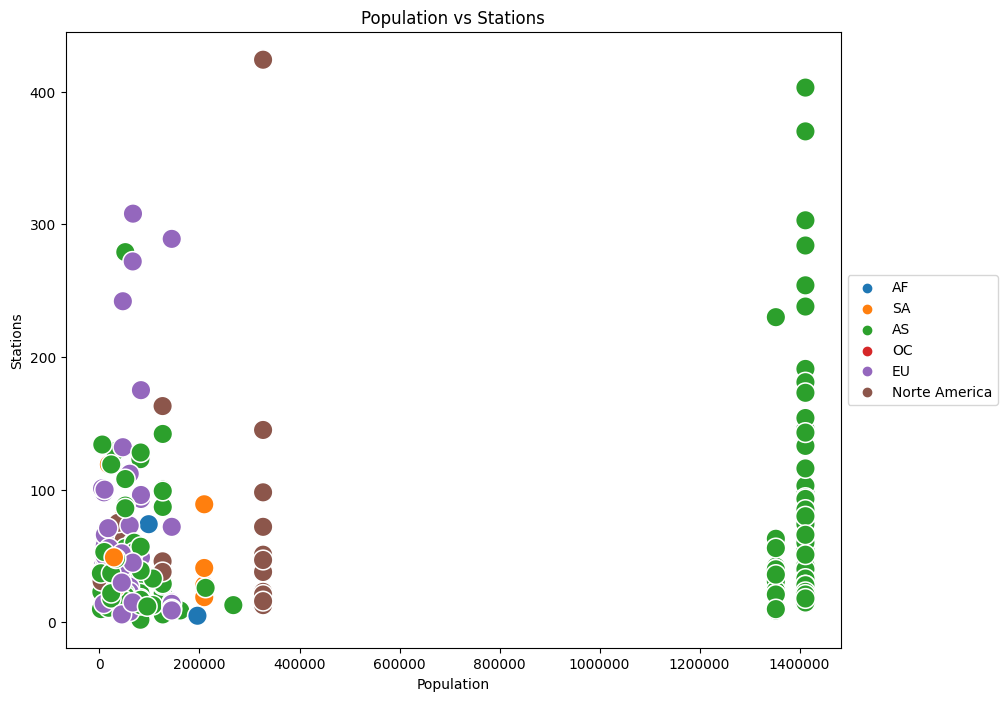

In [ ]:
import matplotlib.ticker as ticker
df_frequency=pd.concat([data_metro['Population'],data_metro['Stations'],data_metro['Continent']],axis=1)
fig,ax=plt.subplots(ncols=1,figsize=(10,8))
sns.scatterplot(data=df_frequency,y="Stations",x="Population",hue="Continent",marker='o',s=200)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x * 1e-3)))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('Population vs Stations')